<a href="https://colab.research.google.com/github/SergeyDLevashov/Impulse1/blob/main/Dephan_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

def clean_and_convert_to_float(s):
    cleaned = re.sub(r"[^0-9.e-]", "", s)  # Зачистка левых символов, которые попадаются на стыке пакетов
    #print (cleaned)
    return float(cleaned)

def process_file(file_path, encoding='ISO-8859-1'):  # KOI-8 натыкается на плохие символы
    results = []
    temperature = []
    current_time = None

    with open(file_path, "r", encoding=encoding) as file:
        for line in file:
            matcht=re.match(r'^;;;(\d{2,5});>>ACM', line)
            if matcht:
                print (matcht.group(1))
                LastOneTime=float(matcht.group(1))-42
            if line.startswith(" Temperature = "):
                current_temp_match = re.search(r" Temperature = (.+?)C?\n", line)
                print (LastOneTime,current_temp_match.group(1))
                temperature.append([float(LastOneTime), float(current_temp_match.group(1))])


            if line.startswith("(CurrTime "):
                current_time_match = re.search(r"\(CurrTime (\d+\.?\d*)", line)
                #print (line)
                if current_time_match:
                    current_time = float(current_time_match.group(1))-42
            elif line.startswith(" Current = ") and line.endswith(("A\n","A \n")):
                current_value_match = re.search(r" Current = (.+?)A?\n", line)
                #print (line,current_value_match)
                if current_value_match:
                    current_value_part = current_value_match.group(1)
                    # Отправляем только то, что в середине
                    current_value = clean_and_convert_to_float(current_value_part)
                    if current_time is not None:
                        current_time+=0.5
                        results.append([current_time, round(current_value*1000000,5)])

    return results,temperature


# Путь в колабе
file_path = '/content/CAN_1a4100fc.bin'
results,temperature = process_file(file_path)

#for result in results:
#    print(result[0],result[1])
for tempr in temperature:
    print(tempr[0],tempr[1])

654
612.0 25.47
655
655
655
656
656
614.0 25.50
667
625.0 25.68
678
636.0 25.92
689
647.0 25.95
700
658.0 26.08
711
669.0 26.18
722
680.0 26.27
733
691.0 26.39
744
702.0 26.47
755
713.0 26.59
766
724.0 26.66
777
735.0 26.76
788
746.0 26.86
799
757.0 26.95
810
768.0 27.04
822
780.0 27.13
833
791.0 27.22
844
802.0 27.30
855
813.0 27.39
866
824.0 27.47
877
835.0 27.63
888
846.0 27.64
899
857.0 27.73
910
868.0 27.81
921
879.0 27.88
932
890.0 27.97
943
901.0 28.04
954
912.0 28.13
965
923.0 28.20
976
934.0 28.28
987
945.0 28.35
998
956.0 28.42
1009
967.0 28.49
1020
978.0 28.64
1031
989.0 28.64
1042
1000.0 28.72
1053
1011.0 28.78
1064
1022.0 28.85
1075
1033.0 28.92
1086
1044.0 28.98
1097
1055.0 29.04
1108
1066.0 29.10
1119
1077.0 29.17
1130
1088.0 29.24
1141
1099.0 29.31
1152
1110.0 29.36
1163
1121.0 29.43
1174
1132.0 29.48
1185
1143.0 29.56
1196
1154.0 29.61
1207
1165.0 29.66
1218
1176.0 29.72
1229
1187.0 29.78
1240
1198.0 29.85
1251
1209.0 29.89
1263
1221.0 29.95
1274
1232.0 30.00
1285
1243

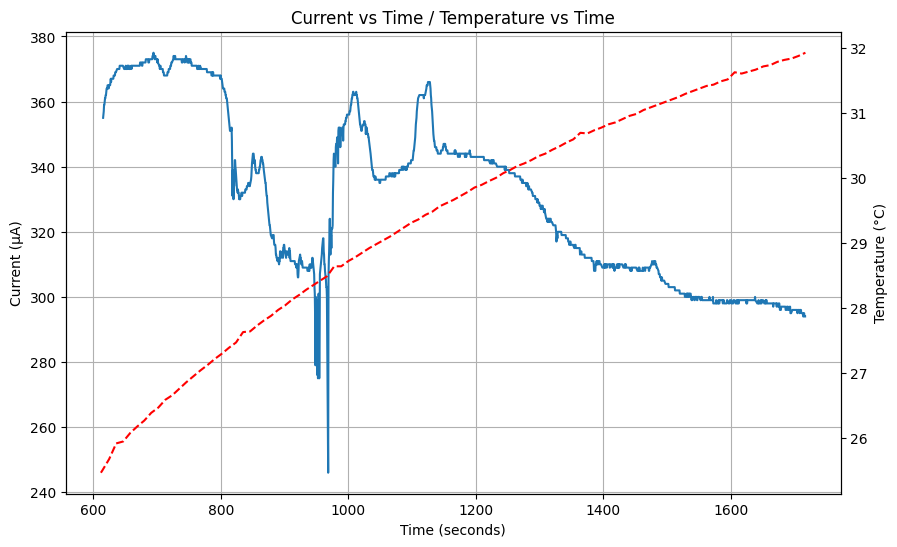

In [ ]:
import matplotlib.pyplot as plt
time = [row[0] for row in results]  # время для первого набора данных
current = [row[1] for row in results]  # ток

time2 = [row[0] for row in temperature]  # время для второго набора данных
temp = [row[1] for row in temperature]  # температура

plt.figure(figsize=(10, 6))

# ток от времени
plt.plot(time, current, label='Current (µA)')
plt.xlabel('Time (seconds)')
plt.ylabel('Current (µA)')
plt.title('Current vs Time / Temperature vs Time')
plt.grid(True)

#plt.xlim(1100, 1150)
#plt.xticks(range(2000, 3100, 100))

# температура от времени
ax2 = plt.twinx()
ax2.plot(time2, temp, label='Temperature (°C)', linestyle='--', color='r')  #
ax2.set_ylabel('Temperature (°C)')


#lines, labels = plt.gca().get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

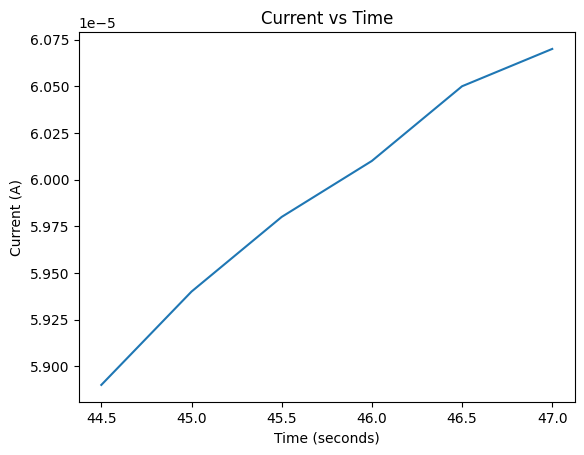

In [ ]:

import matplotlib.pyplot as plt

results = []

results.append([44.5, 5.89e-05])
results.append([45.0, 5.94e-05])
results.append([45.5, 5.98e-05])
results.append([46.0, 6.01e-05])
results.append([46.5, 6.05e-05])
results.append([47.0, 6.07e-05])

time = [row[0] for row in results]  # время
current = [row[1] for row in results]  #  ток


plt.plot(time, current)


plt.xlabel('Time (seconds)')
plt.ylabel('Current (A)')
plt.title('Current vs Time')


plt.show()
